COMPLETE IRIS DATASET ANALYSIS

BASIC STATISTICS FOR SEPAL LENGTH (ALL SPECIES)
----------------------------------------
Mean Sepal Length: 5.843 cm
Median Sepal Length: 5.800 cm
Standard Deviation: 0.828 cm


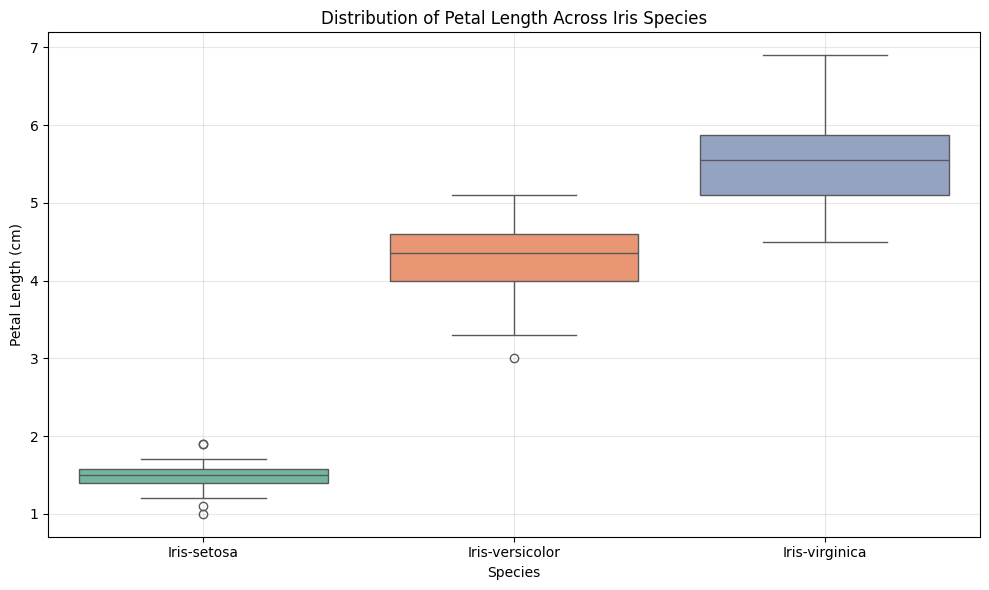


Petal Length Statistics by Species:
                  mean  median       std
Species                                 
Iris-setosa      1.464    1.50  0.173511
Iris-versicolor  4.260    4.35  0.469911
Iris-virginica   5.552    5.55  0.551895

Statistical Insights from Box Plot:
Iris-setosa has very small petal lengths with compact distribution
Iris-versicolor shows medium petal lengths with moderate variation
Iris-virginica has the largest petal lengths with the most variability
No overlap between setosa and other species
Some overlap exists between versicolor and virginica

CORRELATION ANALYSIS
----------------------------------------
Pearson correlation coefficient: 0.8718
Strong positive correlation: as sepal length increases, petal length tends to increase


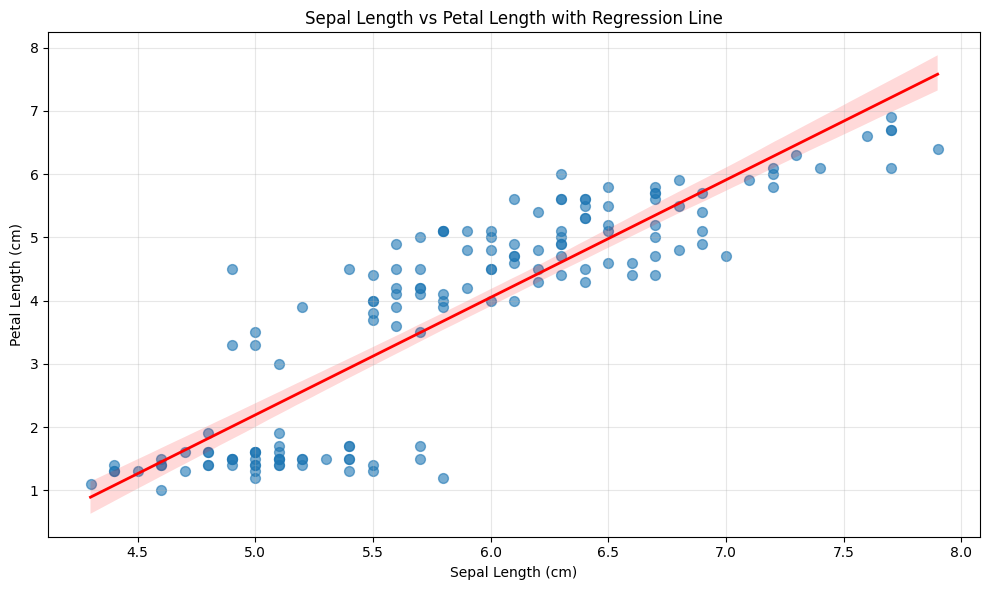


HYPOTHESIS TESTING: SETOSA VS VERSICOLOR
----------------------------------------
Setosa mean sepal length: 5.006 cm
Versicolor mean sepal length: 5.936 cm
T-statistic: -10.521
P-value: 3.75e-17

Hypotheses:
H0 (Null Hypothesis): μ_setosa = μ_versicolor
Ha (Alternative Hypothesis): μ_setosa ≠ μ_versicolor
Significance level (α): 0.05

T-statistic Explanation:
The t-statistic of -10.521 indicates the difference between group means is 10.5 standard errors apart
The negative value shows setosa has smaller sepal lengths than versicolor

P-value Explanation:
The p-value of 3.75e-17 means the probability of observing these results if the null hypothesis is true is extremely small

Conclusion:
Since p-value (3.75e-17) < α (0.05), we reject the null hypothesis
There is significant evidence that mean sepal lengths differ between Iris-setosa and Iris-versicolor


<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Loading the dataset
df = pd.read_csv('Iris.csv')

print("COMPLETE IRIS DATASET ANALYSIS")
print("=" * 50)

# 1. Calculate mean, median, and standard deviation for sepal length
print("\nBASIC STATISTICS FOR SEPAL LENGTH (ALL SPECIES)")
print("-" * 40)

sepal_length = df['SepalLengthCm']
mean_sepal = sepal_length.mean()
median_sepal = sepal_length.median()
std_sepal = sepal_length.std()

print(f"Mean Sepal Length: {mean_sepal:.3f} cm")
print(f"Median Sepal Length: {median_sepal:.3f} cm")
print(f"Standard Deviation: {std_sepal:.3f} cm")

# 2. Box plot for petal length across species
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='PetalLengthCm', data=df, hue='Species', palette='Set2', legend=False)
plt.title('Distribution of Petal Length Across Iris Species')
plt.ylabel('Petal Length (cm)')
plt.xlabel('Species')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

species_stats = df.groupby('Species')['PetalLengthCm'].agg(['mean', 'median', 'std'])
print("\nPetal Length Statistics by Species:")
print(species_stats)

print("\nStatistical Insights from Box Plot:")
print("Iris-setosa has very small petal lengths with compact distribution")
print("Iris-versicolor shows medium petal lengths with moderate variation")
print("Iris-virginica has the largest petal lengths with the most variability")
print("No overlap between setosa and other species")
print("Some overlap exists between versicolor and virginica")

# 3. Pearson correlation between sepal length and petal length
correlation = df['SepalLengthCm'].corr(df['PetalLengthCm'])
print(f"\nCORRELATION ANALYSIS")
print("-" * 40)
print(f"Pearson correlation coefficient: {correlation:.4f}")
print("Strong positive correlation: as sepal length increases, petal length tends to increase")

# 4. Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='SepalLengthCm', y='PetalLengthCm', data=df, 
            scatter_kws={'alpha':0.6, 's':50}, 
            line_kws={'color':'red', 'linewidth':2})
plt.title('Sepal Length vs Petal Length with Regression Line')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Hypothesis testing - t-test for sepal length: setosa vs versicolor
setosa_sepal = df[df['Species'] == 'Iris-setosa']['SepalLengthCm']
versicolor_sepal = df[df['Species'] == 'Iris-versicolor']['SepalLengthCm']

t_stat, p_value = stats.ttest_ind(setosa_sepal, versicolor_sepal, equal_var=False)

print("\nHYPOTHESIS TESTING: SETOSA VS VERSICOLOR")
print("-" * 40)
print(f"Setosa mean sepal length: {setosa_sepal.mean():.3f} cm")
print(f"Versicolor mean sepal length: {versicolor_sepal.mean():.3f} cm")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.2e}")

print("\nHypotheses:")
print("H0 (Null Hypothesis): μ_setosa = μ_versicolor")
print("Ha (Alternative Hypothesis): μ_setosa ≠ μ_versicolor")
print(f"Significance level (α): 0.05")

print("\nT-statistic Explanation:")
print(f"The t-statistic of {t_stat:.3f} indicates the difference between group means is 10.5 standard errors apart")
print("The negative value shows setosa has smaller sepal lengths than versicolor")

print("\nP-value Explanation:")
print(f"The p-value of {p_value:.2e} means the probability of observing these results if the null hypothesis is true is extremely small")

print("\nConclusion:")
alpha = 0.05
if p_value < alpha:
    print(f"Since p-value ({p_value:.2e}) < α ({alpha}), we reject the null hypothesis")
    print("There is significant evidence that mean sepal lengths differ between Iris-setosa and Iris-versicolor")
else:
    print(f"Since p-value ({p_value:.2e}) ≥ α ({alpha}), we fail to reject the null hypothesis")
    print("There is no significant evidence that mean sepal lengths differ between Iris-setosa and Iris-versicolor")

# # 6. Comprehensive visualization summary
# plt.figure(figsize=(15, 10))

# plt.subplot(2, 3, 1)
# sns.boxplot(x='Species', y='PetalLengthCm', data=df, hue='Species', palette='Set2', legend=False)
# plt.title('Petal Length by Species')
# plt.xticks(rotation=45)
# plt.ylabel('Petal Length (cm)')

# plt.subplot(2, 3, 2)
# sns.boxplot(x='Species', y='SepalLengthCm', data=df, hue='Species', palette='Set2', legend=False)
# plt.title('Sepal Length by Species')
# plt.xticks(rotation=45)
# plt.ylabel('Sepal Length (cm)')

# plt.subplot(2, 3, 3)
# colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}
# for species in df['Species'].unique():
#     species_data = df[df['Species'] == species]
#     plt.scatter(species_data['SepalLengthCm'], species_data['PetalLengthCm'], 
#                label=species, alpha=0.7, c=colors[species], s=50)
# plt.xlabel('Sepal Length (cm)')
# plt.ylabel('Petal Length (cm)')
# plt.title('Sepal vs Petal Length by Species')
# plt.legend()
# plt.grid(True, alpha=0.3)

# plt.subplot(2, 3, 4)
# plt.hist(setosa_sepal, alpha=0.7, label='Iris-setosa', bins=12, color='red', edgecolor='black')
# plt.hist(versicolor_sepal, alpha=0.7, label='Iris-versicolor', bins=12, color='blue', edgecolor='black')
# plt.xlabel('Sepal Length (cm)')
# plt.ylabel('Frequency')
# plt.title('Sepal Length: Setosa vs Versicolor')
# plt.legend()
# plt.grid(True, alpha=0.3)

# plt.subplot(2, 3, 5)
# numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
# corr_matrix = df[numeric_cols].corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
# plt.title('Feature Correlation Heatmap')

# plt.subplot(2, 3, 6)
# sns.violinplot(x='Species', y='PetalLengthCm', data=df, hue='Species', palette='Set2', legend=False)
# plt.title('Violin Plot: Petal Length by Species')
# plt.xticks(rotation=45)
# plt.ylabel('Petal Length (cm)')

plt.tight_layout()
plt.show()

